# A quick example on how to deal with the data

This notebook serves as a little guidance on how to deal with the reduced brite data. Please look through this carefully, and take note of the comments.

# Features Todo
- ~~point to point scatter~~
- T, 1/T
- ~~Number of datapoints~~
- Time sampling
- ~~Noise~~

In [1]:
#this should always be your starting point on any notebook. Loads the data types
from common import * 

/Users/marco/.brite


/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# using the load function, you can load a certain field from your hard drive. It returns a list
# of possible stars, which you can use
stars = load(10)
stars

[HD195068,
 HD200310,
 HD201433,
 HD194093,
 HD188892,
 HD202850,
 HD198478,
 HD203064,
 HD199629,
 HD194335,
 HD189687,
 HD195295,
 HD202109,
 HD202904,
 HD192685,
 HD198183,
 HD192640,
 HD198726,
 HD186882,
 HD202444,
 HD189178,
 HD198639,
 HD200120,
 HD195556,
 HD192577,
 HD193237,
 HD201078,
 HD199081,
 HD189849,
 HD197345,
 HD191610,
 HD197989]

In [3]:
#pick one of the stars you are interested in
star = stars[0]

In [4]:
#most stars will have a number of subfolders, with multiple reductions in them. Pick the one
#you like
star.results

['all']

In [5]:
#Feed the result you like into the get_data function which loads the data in the Data object
data = star.get_data(star.results[0])

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1189 of "dubious year (Note 3)"
  ErfaWarning)


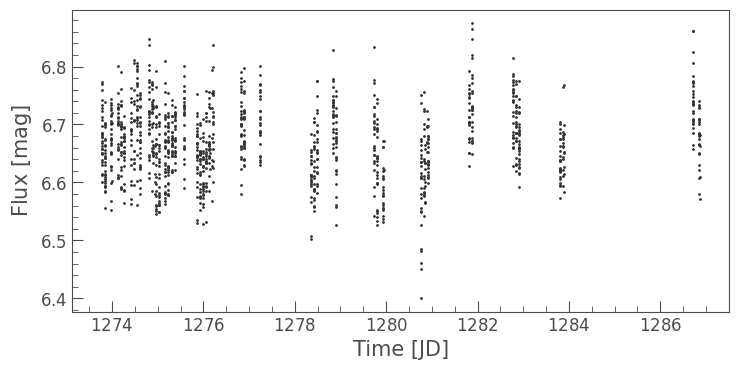

In [6]:
#Now you can plot the data :)
data.scatter()

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1189 of "dubious year (Note 3)"
  ErfaWarning)


<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{mag}$]'>

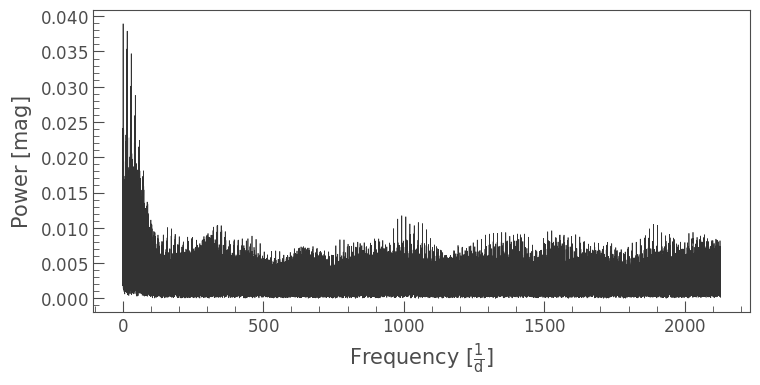

In [7]:
#You can also convert any given lightcurve into a periodogram
data.to_periodogram().plot()

In [8]:
#You can also take a look at simbad for any given star
star.simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
* 43 Cyg,20 27 02.2677,+49 23 00.097,14,14,0.052,0.065,90,A,O,2018yCat.1345....0G,1


In [9]:
#Resulting RMS for a star
data.rms

0.06351848055283563

In [10]:
#Point-to-point scatter
data.ptp_scatter

0.0747613242866317

In [11]:
#Noise, as computed by the last n points for the periodogram
data.noise(100)

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1189 of "dubious year (Note 3)"
  ErfaWarning)


<Quantity 0.0029739 mag>

In [12]:
#Number of datapoints for any given star
data.datapoints

1189

In [13]:
#You can also easily get the raw data (time,flux, flux_err)
data.raw_data

array([[1.27377473e+03, 1.27377496e+03, 1.27377520e+03, ...,
        1.28685800e+03, 1.28685824e+03, 1.28685847e+03],
       [6.69785000e+00, 6.67836000e+00, 6.71372000e+00, ...,
        6.60900000e+00, 6.57215000e+00, 6.68131000e+00],
       [4.69753970e-02, 4.69753970e-02, 4.69753970e-02, ...,
        4.54465770e-02, 4.54465770e-02, 4.54465770e-02],
       ...,
       [6.32000000e-04, 5.44000000e-04, 4.99000000e-04, ...,
        6.39000000e-04, 4.30000000e-04, 5.76000000e-04],
       [4.90000000e+01, 8.50000000e+01, 5.70000000e+01, ...,
        5.10000000e+01, 1.43000000e+02, 5.45000000e+02],
       [6.35604670e-01, 6.39002550e-01, 6.42400440e-01, ...,
        8.07965810e-01, 8.11363700e-01, 8.14761580e-01]])

In [14]:
data.path

'/Users/marco/Google Drive/Astroseismology/BRITE decorrelation summer 2021/Decorrelations/Field 10/RESULTS/HD195068/HD195068_10-Cyg-II-2015_BLb_2_3_A.ndat'

In [15]:
data

HD195068 -> HD195068_10-Cyg-II-2015_BLb_2_3_A.ndat

In [17]:
# You may also want to just create a data object from a path.
# For this you can access the configuration directly (recommended)

config_dict = get_config()
config_dict

{'Decorrelation Path': '/Users/marco/Google Drive/Astroseismology/BRITE decorrelation summer 2021'}

In [21]:
path = os.path.join(config_dict['Decorrelation Path'],'Decorrelations/Field 9/HD_143275/02-06-21_GD/RESULTS/HD143275_09-Sco-I-2015_BAb_2_3_A.ndat')
path

'/Users/marco/Google Drive/Astroseismology/BRITE decorrelation summer 2021/Decorrelations/Field 9/HD_143275/02-06-21_GD/RESULTS/HD143275_09-Sco-I-2015_BAb_2_3_A.ndat'

In [22]:
data = Data(path,None)

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1809 of "dubious year (Note 3)"
  ErfaWarning)


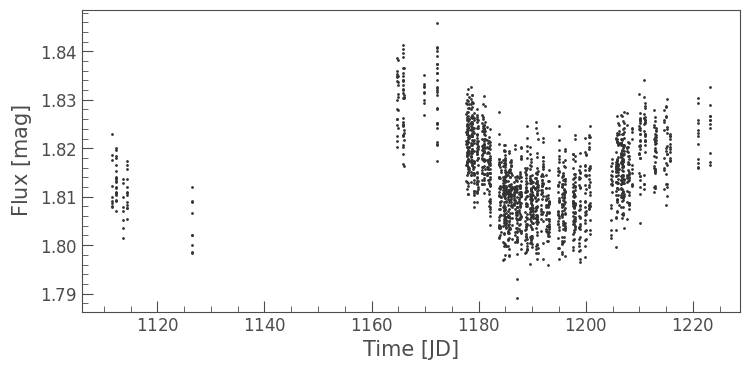

In [24]:
data.scatter()

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1809 of "dubious year (Note 3)"
  ErfaWarning)


<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{mag}$]'>

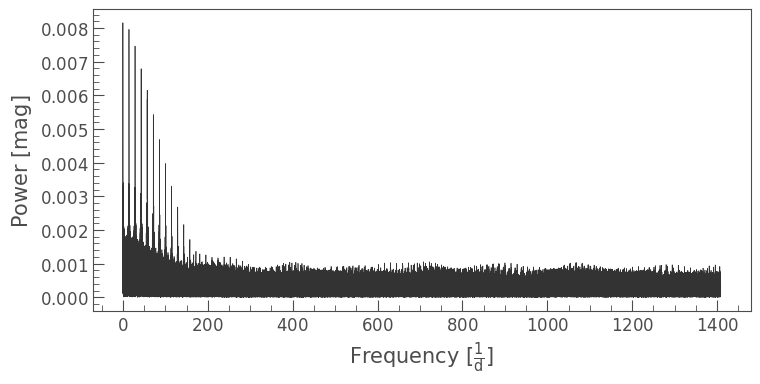

In [25]:
data.to_periodogram().plot()